['CUENCA', 'GIRON', 'GUALACEO', 'NABON', 'PAUTE', 'PUCARA', 'SAN FERNANDO', 'SANTA ISABEL', 'SIGSIG', 'OÑA', 'CHORDELEG', 'EL PAN', 'SEVILLA DE ORO', 'GUACHAPALA', 'CAMILO PONCE ENRIQUEZ', 'GUARANDA', 'CHILLANES', 'CHIMBO', 'ECHEANDIA', 'SAN MIGUEL', 'CALUMA', 'LAS NAVES', 'AZOGUES', 'BIBLIAN', 'CAÑAR', 'LA TRONCAL', 'EL TAMBO', 'DELEG', 'SUSCAL', 'TULCAN', 'BOLIVAR', 'ESPEJO', 'MIRA', 'MONTUFAR', 'SAN PEDRO DE HUACA', 'LATACUNGA', 'LA MANA', 'PANGUA', 'PUJILI', 'SALCEDO', 'SAQUISILI', 'SIGCHOS', 'RIOBAMBA', 'ALAUSI', 'COLTA', 'CHAMBO', 'CHUNCHI', 'GUAMOTE', 'GUANO', 'PALLATANGA', 'PENIPE', 'CUMANDA', 'MACHALA', 'ARENILLAS', 'ATAHUALPA', 'BALSAS', 'CHILLA', 'EL GUABO', 'HUAQUILLAS', 'MARCABELI', 'PASAJE', 'PIÑAS', 'PORTOVELO', 'SANTA ROSA', 'ZARUMA', 'LAS LAJAS', 'ESMERALDAS', 'ELOY ALFARO', 'MUISNE', 'QUININDE', 'SAN LORENZO', 'ATACAMES', 'RIOVERDE', 'LA CONCORDIA', 'GUAYAQUIL', 'ALFREDO BAQUERIZO MORENO', 'BALAO', 'BALZAR', 'COLIMES', 'DAULE', 'DURAN', 'EMPALME', 'EL TRIUNFO', 'MILAG

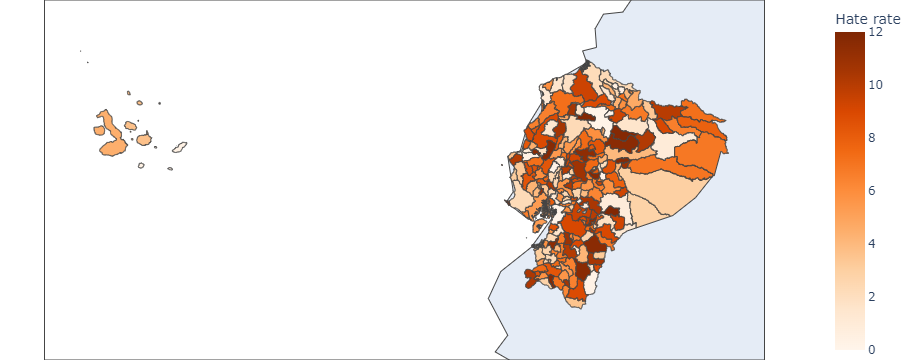

In [45]:
import json
import requests
import pandas as pd
import numpy as np
import plotly.express as px


polygons = requests.get(
    "https://data.humdata.org/dataset/e66dbc70-17fe-4230-b9d6-855d192fc05c/resource/6fa37b41-ad28-40a6-9641-3b4efd4dbe13/download/ecuador.geojson"
).json()

name_cantones  =  []
for i, a in enumerate(polygons['features']):
    name_cantones.append(a['properties']['DPA_DESCAN'])

    
print(name_cantones)
    
df = pd.DataFrame(
    {"fips": range(0, 224, 1), "unemp": np.random.uniform(0, 12, 224), "names": name_cantones}
)

for i, a in enumerate(polygons['features']):
    a['properties']['ID_3'] = i

#print(polygons['features'])
    
fig = px.choropleth(
    df,
    geojson=polygons,
    locations="fips",
    featureidkey="properties.ID_3",
    color="unemp",
    color_continuous_scale="Oranges",
    range_color=(0, 12),
    # scope="europe",
    hover_name = "names",
    hover_data = ["names"],
    labels={"unemp": "Hate rate"},
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})



fig.update_geos(fitbounds="locations", visible=True)
fig.show()
